<a id='top' name ="top"></a>

# How COVID-19 affected GHG emissions of ferries in Europe

[![DOI:10.3390](http://img.shields.io/badge/DOI-10.3390/su14095287-blue.svg)](https://doi.org/10.3390/su14095287)
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.6473158.svg)](https://doi.org/10.5281/zenodo.6473158)

<table>
<thead>
  <tr>
    <td><a href="https://orcid.org/0000-0001-9205-7765" target='_blank'><img width=15 src="https://upload.wikimedia.org/wikipedia/commons/0/06/ORCID_iD.svg"></a> G. Mannarini<sup>1</sup></td>
    <td><a href="https://orcid.org/0000-0002-4045-4790" target='_blank'><img width=15 src="https://upload.wikimedia.org/wikipedia/commons/0/06/ORCID_iD.svg"></a> M.L. Salinas<sup>1</sup></td>
    <td><a href="https://orcid.org/0000-0003-4259-3505" target='_blank'><img width=15 src="https://upload.wikimedia.org/wikipedia/commons/0/06/ORCID_iD.svg"></a> L. Carelli<sup>1</sup></td>
    <td><a href="https://orcid.org/0000-0001-5132-9488" target='_blank'><img width=15 src="https://upload.wikimedia.org/wikipedia/commons/0/06/ORCID_iD.svg"></a>   A. Fassò<sup>2</sup></td>
  </tr>
</thead>
</table>


## Preamble \& Table of Contents


<hr>

This Colab notebook reproduces the cross-validation pipeline of the presented Linear Mixed Effects Models. 

Run, in order, the cells of this notebook to:
  
  **1**. import CV routines library and load data in a Pandas DataFrame.<br>Optionally the user can change the reference category for Dom and VType predictors <br>[go to cell **1** &#8594;](#1)
  <br><br><span style="color:orange">[Note: If the import fails because of a <i>"Dead Kernel"</i> error, try the fix proposed in cell **0** [go to cell **0** &#8594;](#0)]</span>

<br>
<br>

  **2**. reproduce the paper results performing a 10-fold cross-validation with the same models<br>[go to cell **2** &#8594;](#2)

<br>

**3**. plot cross-validation results <br>[go to cell **3** &#8594;](#3)

<br>

The output will be locally stored in the `./crossvalidation/` directory.

---

### References [[to top]](#top)

[![DOI:10.3390](http://img.shields.io/badge/DOI-10.3390/su14095287-blue.svg)](https://doi.org/10.3390/su14095287)
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.6473158.svg)](https://doi.org/10.5281/zenodo.6473158)


Please, when using this code and the data available on Zenodo, cite the references listed below according to your needs:

```
@dataset{mannarini_gianandrea_2022_6473158,
  author       = {Mannarini, Gianandrea and
                  Salinas, Mario and
                  Carelli, Lorenzo and
                  Fassò, Alessandro},
  title        = {COVID-CO2-ferries},
  month        = {April},
  year         = {2022},
  note         = {(c) Fondazione CMCC, 2022  ERDF through Italy-Croatia Interreg Programme: 10043587 (GUTTA)},
  publisher    = {Zenodo},
  doi          = {10.5281/zenodo.6473158},
  url          = {https://doi.org/10.5281/zenodo.6473158}
}



@article{su14095287,
  author         = {Mannarini, Gianandrea and Salinas, Mario Leonardo and Carelli, Lorenzo and Fassò, Alessandro},
  title          = {How COVID-19 Affected GHG Emissions of Ferries in Europe},
  journal        = {Sustainability},
  volume         = {14},
  year           = {2022},
  number         = {9},
  article-number = {5287},
  note           = {(c) Fondazione CMCC, 2022  ERDF through Italy-Croatia Interreg Programme: 10043587 (GUTTA)}
  url            = {https://www.mdpi.com/2071-1050/14/9/5287},
  issn           = {2071-1050},
  doi            = {10.3390/su14095287}
}

```

---


**Copyright (c) Fondazione CMCC, 2022**

*ERDF through Italy-Croatia Interreg Programme: 10043587 (GUTTA)*


---

<sup>1</sup> [CMCC Foundation](http://www.cmcc.it)

<sup>2</sup> [Università degli studi di Bergamo](http://www.unibg.it)

<a id='0' name='0'></a>
### **0. OPTIONAL: Fix Dead Kernel possible bug on Windows** [[to top]](#top)

In [ ]:
import os
home_dir = expanduser('~').replace('\\', '/')
rh = '%s/anaconda3/envs/su-venv/Lib/R' % home_dir
os.environ['R_HOME'] = rh
os.environ["PATH"]   = r"%s/bin/x64" % rh + ";" + os.environ["PATH"]

<a id="1" name='1'></a>
### **1. Import CV routines library and load data** (waiting time ~10 s) [[to top]](#top)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import cv_routines as cv

root_dir = './'
data = ''

# download the data from Zenodo
zenodo_id = '6473158' # to be published
data_name = 'COVID-CO2-ferries.csv' # to be published
url = 'https://zenodo.org/record/%s/files/%s' % (zenodo_id, data_name)
print('==================================================')
print('Downloading data from:\n%s\n...' % url)
try:
    # !wget {url}
    # load csv in a Pandas DataFrame
    data = cv.pd.read_csv(url)
    # print('Data successfully downloaded in %s' % data_name)
    print('Data successfully downloaded.')
    print('%d rows in data.'%len(data))
    print('==================================================')
except:
    print('Some error occured during download.\nYou can download it directly form:\n\n%s' % url)

In [2]:
data.head()

,IMOn,Eber,Etot,Dom,COVID,year,Pme,LOA,nPax,yearB,nCalls,VType
0,6511128,761.75,6941.34,MED,no,2018,0,0,0,0,262,_00
1,6511128,635.09,4909.30,MED,no,2019,0,0,0,0,180,_00
2,7037806,2127.72,16751.35,NOR,no,2018,0,0,1,0,1345,_02
3,7037806,1335.90,11118.41,NOR,no,2019,0,0,1,0,793,_02
4,7037806,1234.60,4947.88,MED,yes,2020,0,0,1,0,113,_02


#### **1.1 Optional: change Domain or VType reference category**

default reference categories are:

| Predictor | Default reference |
|:---------:|:-----------------:|
|    Dom    |        BAL        |
|   VType   |         0         |


In [ ]:
"""
    Change Domain reference category. Default = BAL
    
    possible values for Domain newRef = ['BAL', 'MED', 'NOR']
"""
# data =  cv.change_Dom_ref(data, newRef = 'MED')

"""
    Change VType reference category. Default = 0

    possible values for newRef = [0, 1, ..., 13, 15]
"""
# data =  cv.change_VType_ref(data, newRef = 1)

<a id='2' name='2'></a>
### **2. Cross-Validation** (waiting time ~10 min) [[to top]](#top)

In [ ]:
# CV params
nfolds = 10
randseed = 1

# CV output directory root
cv_dir = 'crossvalidation/%dfold_%dseed/' % (nfolds, randseed)

# run cv and save results for both Etot and Eber
for dep_var in ['Etot', 'Eber']:
    print('*****************************************************************************************')
    print('                               Cross validating %s                           '  %  dep_var)
    print('*****************************************************************************************')

    models = cv.get_SU_models(dep_var)

    models_dict = dict(zip(range(1, len(models)+1), models))

    # output directory
    outdir = '%s%s/' % (cv_dir, dep_var)

    # create output dir
    cv.create_dir(root_dir, outdir)
    outdir = root_dir + outdir

    cv.cross_validation(data, models_dict, dep_var, nfolds=nfolds, randseed=randseed, save_dir=outdir)

<a id='3' name='3'></a>
### **3. Plot CV results** (waiting time ~5 s) [[to top]](#top)

Etot cv results plot saved in png/pdf:
./crossvalidation/10fold_1seed/Etot/Etot_cv_results<.fmt>


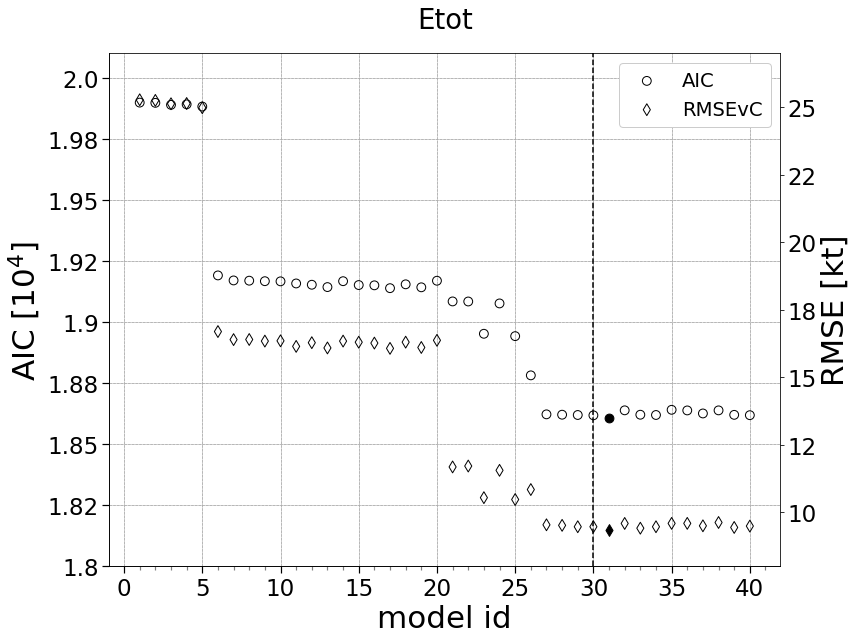

Eber cv results plot saved in png/pdf:
./crossvalidation/10fold_1seed/Eber/Eber_cv_results<.fmt>


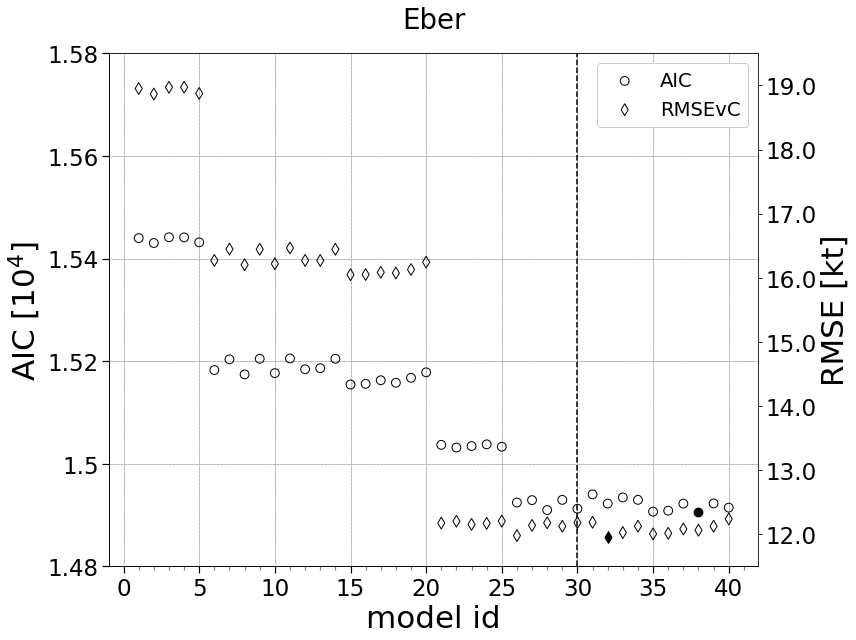

In [5]:
dep_var = 'Etot'
outdir  = '%s%s%s/' % (root_dir, cv_dir, dep_var)
cv.cv_results_plot(dep_var, chosen_model=30, cv_dir=cv_dir, outdir=outdir, save_plot=True)

dep_var = 'Eber'
outdir  = '%s%s%s/' % (root_dir, cv_dir, dep_var)
cv.cv_results_plot(dep_var, chosen_model=30, cv_dir=cv_dir, outdir=outdir, save_plot=True)

# plot without chosen model
# cv.cv_results_plot(dep_var, chosen_model=None, cv_dir=cv_dir, save_plot=True)